# Lecture : Graph SVM

## Lab 01 : Standard/Linear SVM -- Solution

### Xavier Bresson, Guoji Fu 

<font color=cyan>

Pandu's Note:

This notebook is about standard SVM, but in kernel way (primal and dual variable)

</font>

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS5284_2025_codes/codes/04_Graph_SVM'
    print(path_to_file)
    # change current path to the folder containing "path_to_file"
    os.chdir(path_to_file)
    !pwd
    

In [2]:
# Load libraries
import numpy as np
import scipy.io
%matplotlib inline
#%matplotlib notebook 
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from IPython.display import display, clear_output
import time
import sys; sys.path.insert(0, 'lib/')
from lib.utils import compute_purity
import warnings; warnings.filterwarnings("ignore")


# Linearly separable data points

In [3]:
# Dataset
mat = scipy.io.loadmat('datasets/data_linearSVM.mat')
Xtrain = mat['Xtrain']
Cgt_train = mat['Cgt_train'] - 1
Cgt_train = Cgt_train.squeeze()
l_train = mat['l'].squeeze()
print(f"Xtrain: {Xtrain.shape}")
print(f"Cgt_train: {Cgt_train.shape}")
print(f"l_train: {l_train.shape}")
print("======================")

n = Xtrain.shape[0]
d = Xtrain.shape[1]
nc = len(np.unique(Cgt_train))
print(n,d,nc)

Xtest = mat['Xtest']
Cgt_test = mat['Cgt_test'] - 1
Cgt_test = Cgt_test.squeeze()
print(f"Xtest: {Xtest.shape}")
print(f"Cgt_test: {Cgt_test.shape}")

Xtrain: (40, 2)
Cgt_train: (40,)
l_train: (40,)
40 2 2
Xtest: (40, 2)
Cgt_test: (40,)


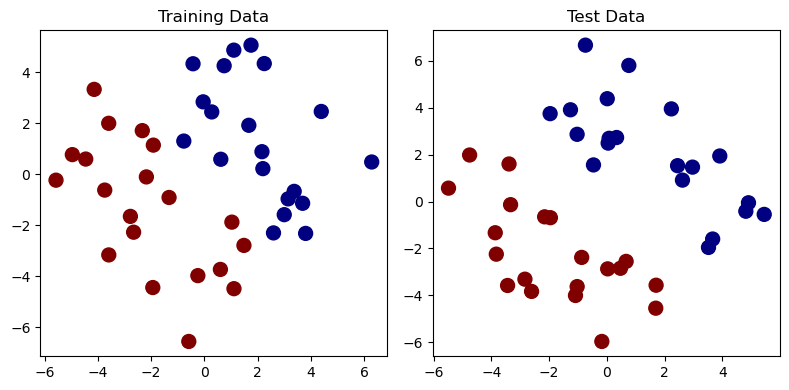

In [4]:
# Plot
plt.figure(figsize=(8,4))
p1 = plt.subplot(121)
size_vertex_plot = 100
plt.scatter(Xtrain[:,0], Xtrain[:,1], s=size_vertex_plot*np.ones(n), c=Cgt_train, color=pyplot.jet())
plt.title('Training Data')
p2 = plt.subplot(122)
size_vertex_plot = 100
plt.scatter(Xtest[:,0], Xtest[:,1], s=size_vertex_plot*np.ones(n), c=Cgt_test, color=pyplot.jet())
plt.title('Test Data')
plt.tight_layout()
plt.show()


### Question 1: Implement the linear SVM on linear separable data using the primal-dual iterative algorithm

*Hint:* Follow Page 18-20, Lecture 4 Slides

**Step 1:** Compute the Linear Kernel $Ker$ and $L, Q$ defined as
- $Ker= XX^\top$,
- $L = \text{diag}(l)$, 
- $Q = LKL$.
 
You may use function `np.diag()`, the transpose operator `.T`, and the matrix-matrix multiplication operator `.dot()`.

<font color=cyan>

Dual Optimization Problem, Lecture 4 Slide 19

</font>
  

In [5]:
# Compute linear kernel, L, Q

l = l_train

############################################################################
# Your code start
############################################################################

Ker = Xtrain.dot(Xtrain.T) # [40, 2] . [40, 2] = [40, 40]
L = np.diag(l) # label (-1 or +1), [40, 40]
Q = L.dot(Ker.dot(L)) # [40, 40]

print(f"Xtrain: {Xtrain.shape}")
print(f"Ker: {Ker.shape}")
print(f"L: {L.shape}")
print(f"Q: {Q}")
############################################################################
# Your code end
############################################################################


Xtrain: (40, 2)
Ker: (40, 40)
L: (40, 40)
Q: [[  2.30756802  -0.16901353  -5.00586838 ...   4.78727834   3.24453807
   -5.40034348]
 [ -0.16901353  25.36703487   5.7369844  ...   0.34777342   0.08201211
   10.83743711]
 [ -5.00586838   5.7369844   11.99684775 ... -10.23724051  -6.97075717
   13.92679401]
 ...
 [  4.78727834   0.34777342 -10.23724051 ...   9.950921     6.7399205
  -10.91591909]
 [  3.24453807   0.08201211  -6.97075717 ...   6.7399205    4.56598747
   -7.46146743]
 [ -5.40034348  10.83743711  13.92679401 ... -10.91591909  -7.46146743
   16.938613  ]]


**Step 2:** Initialize $\alpha^{k=0} = \beta^{k=0} = 0_n$.

You may use function `np.zeros()` for initializing a zero vector.

<font color=cyan>

Dual Optimization Problem, Lecture 4 Slide 20

</font>

In [6]:
# Initialization
############################################################################
# Your code start
############################################################################

alpha = np.zeros([n])
beta = np.zeros([n])

############################################################################
# Your code end
############################################################################


**Step 3:** Choose the time steps $\tau_\alpha, \tau_\beta$ such that $\tau_\alpha\tau_\beta \leq \frac{1}{\|Q\| \cdot \|L\|}$.

Some feasible choices can be $\tau_\alpha = \frac{a}{\|Q\|}, \tau_\beta = \frac{b}{\|L\|}$, where $ab \leq 1$.

You may use `np.linalg.norm()` to compute the norm of a matrix.

Try to evaluate the performance of linear SVM with different choices of time steps.
  
<font color=cyan>

Dual Optimization Problem, Lecture 4 Slide 20

</font>

In [7]:
# Time steps
############################################################################
# Your code start
############################################################################

tau_alpha = 10/ np.linalg.norm(Q,2)
tau_beta = 0.1/ np.linalg.norm(L,2)
print(f"tau_alpha: {tau_alpha}")
print(f"tau_beta: {tau_beta}")

############################################################################
# Your code end
############################################################################


tau_alpha: 0.03075247000550136
tau_beta: 0.1


**Step 4:** Project alpha to $[0, +\infty]$ during the update of alpha and beta with conjuguate gradient.


Q: (40, 40)
Acg: (40, 40)
LKXtest: (40, 40)
alpha_old: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


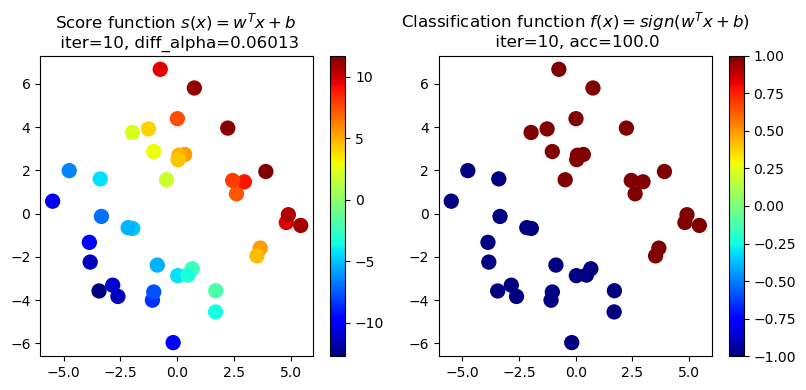

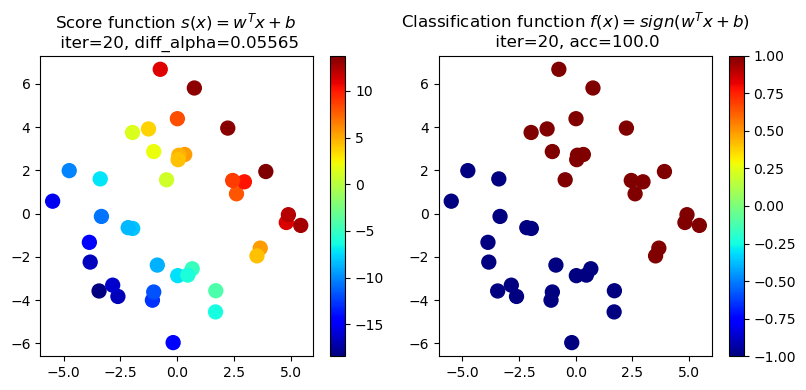

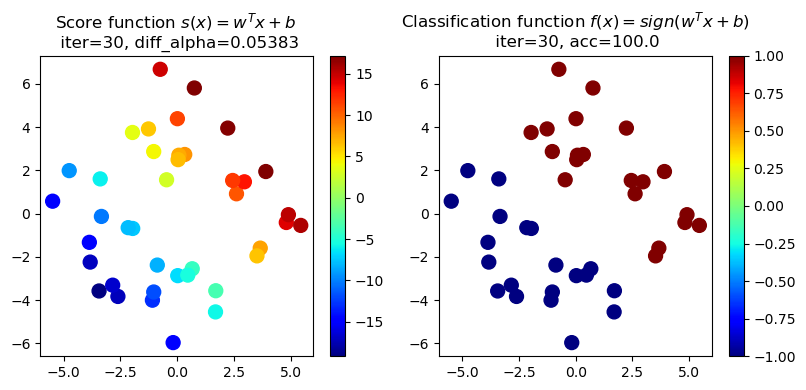

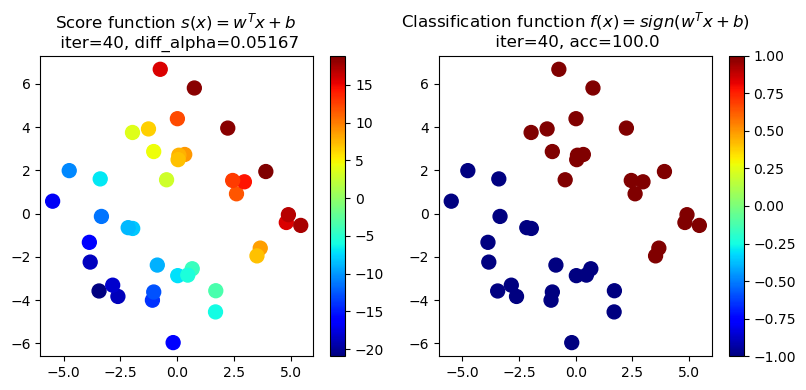

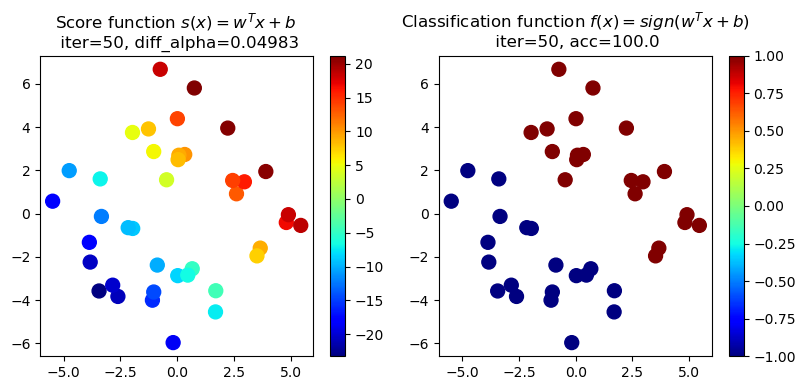

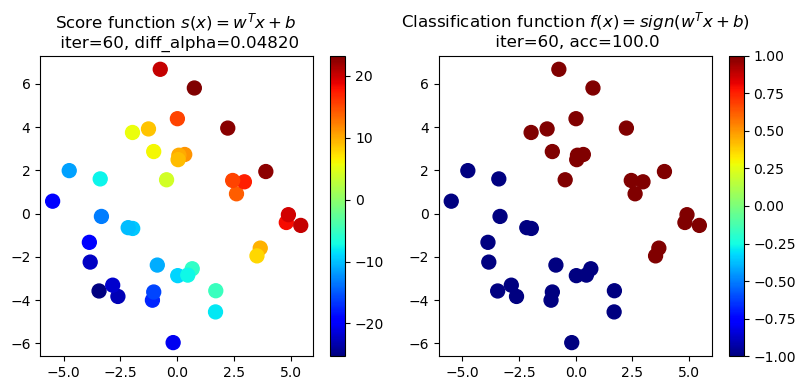

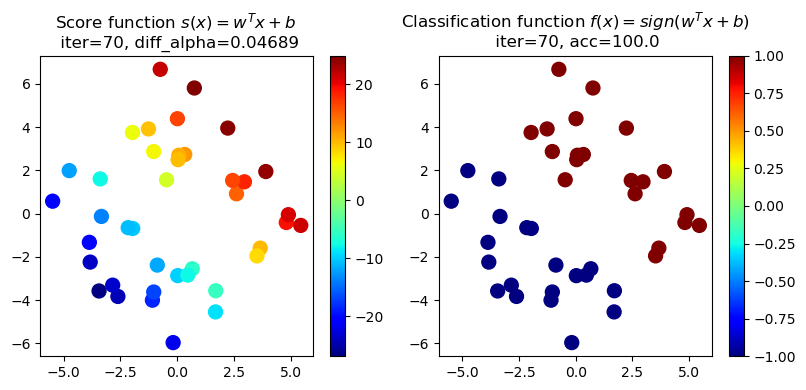

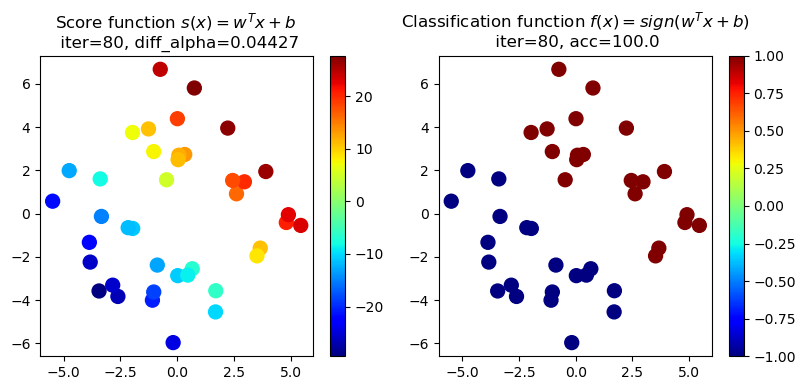

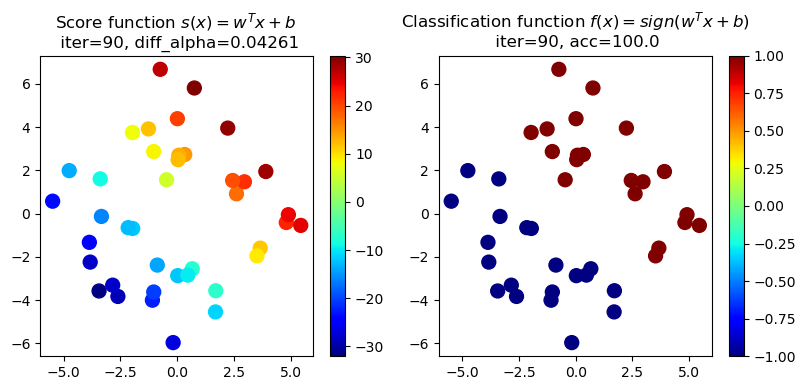

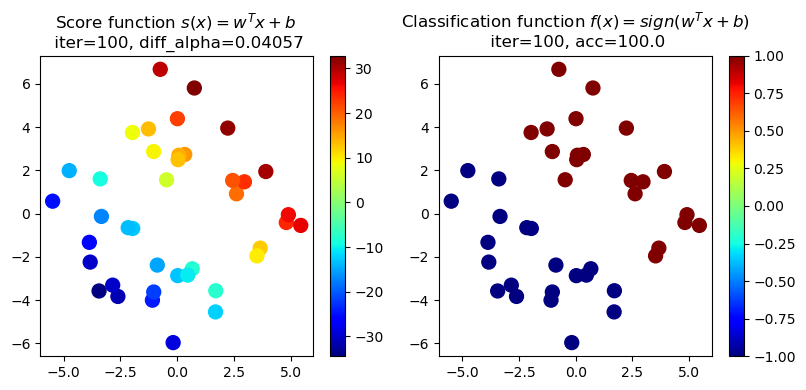

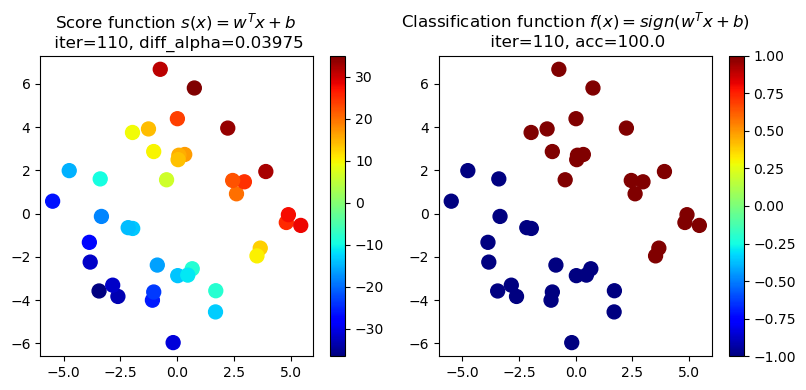

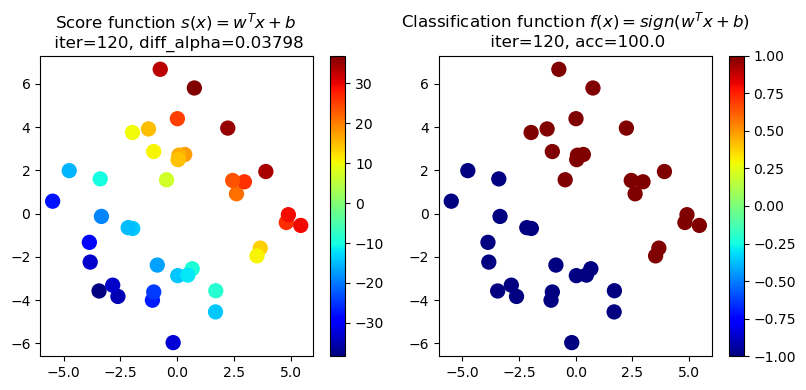

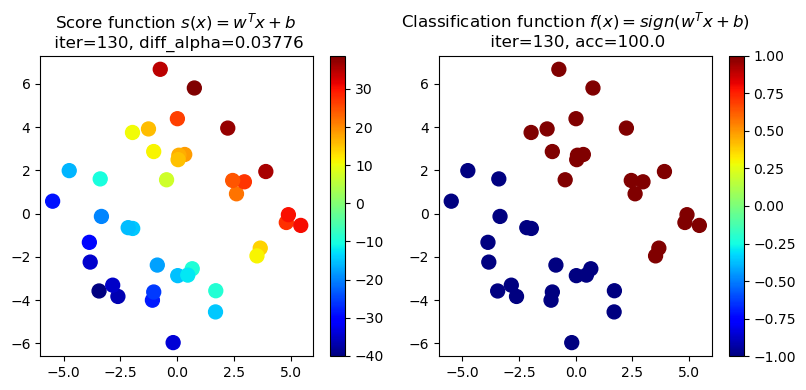

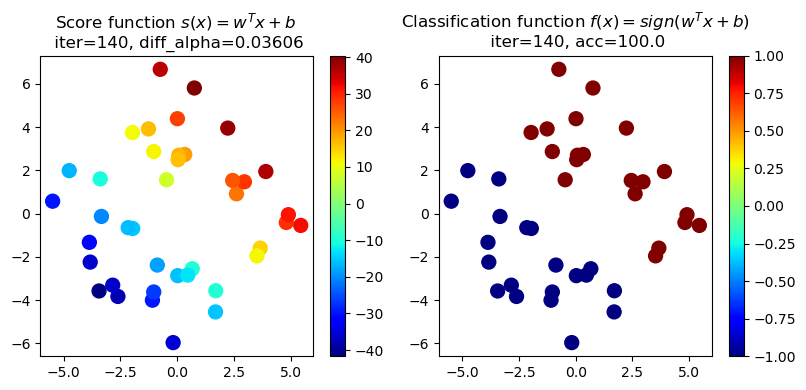

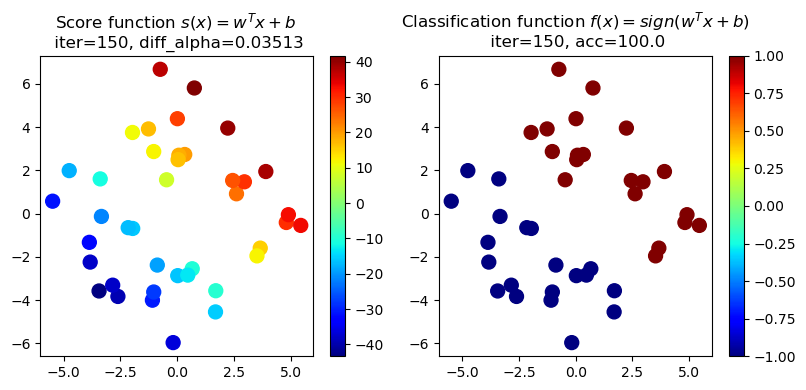

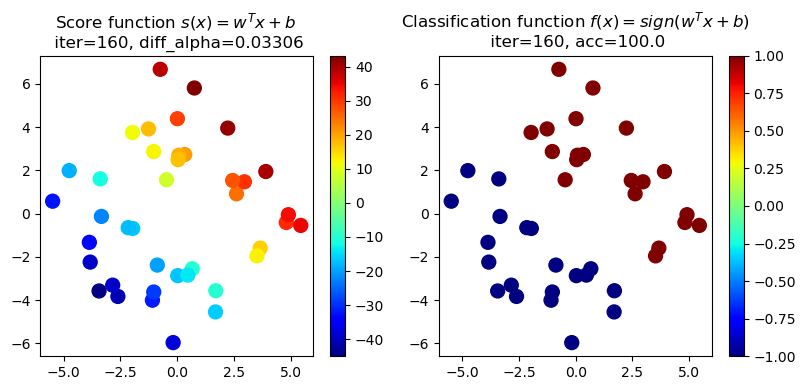

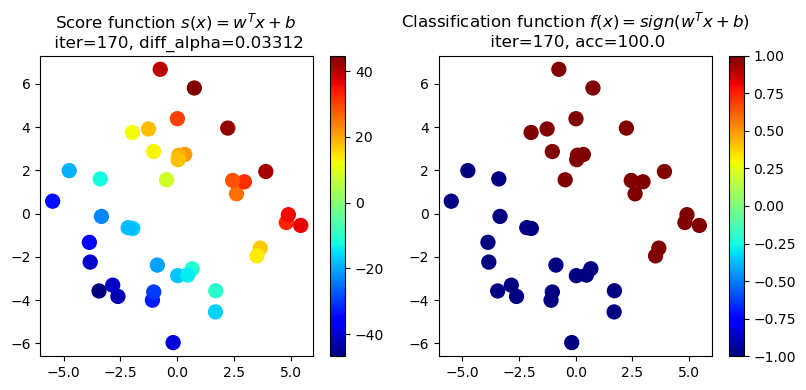

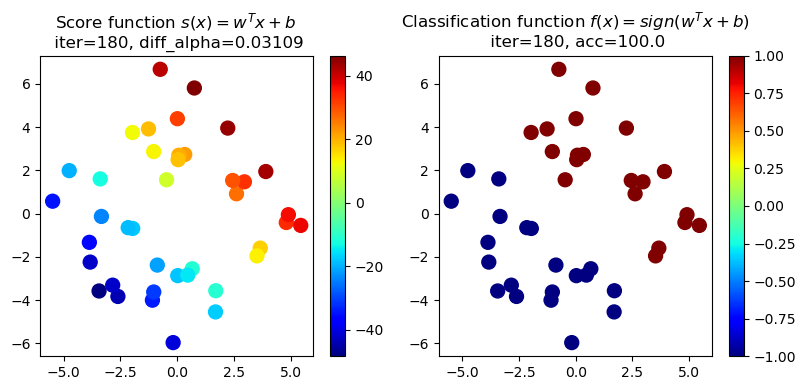

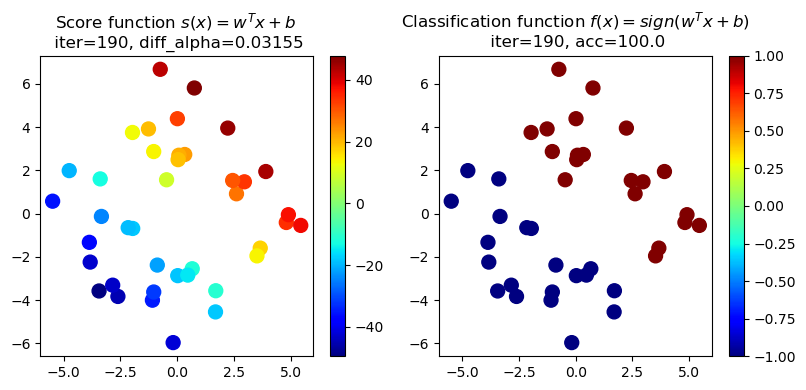

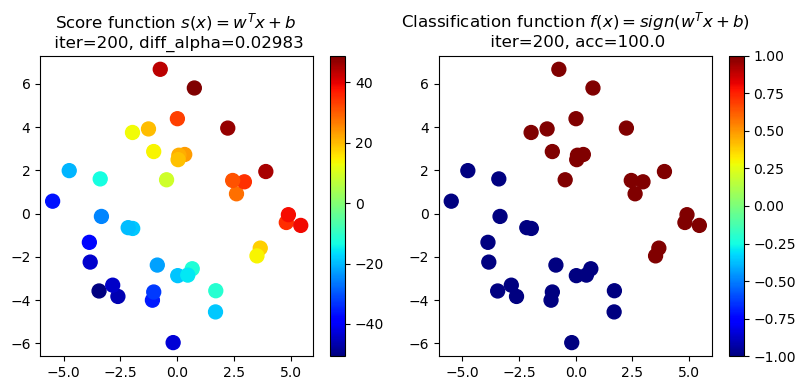

In [8]:
# Run Linear SVM

""" WE ONLY REPEATING THE CODE AGAIN HERE """
# Compute linear kernel, L, Q
Ker = Xtrain.dot(Xtrain.T)
l = l_train
L = np.diag(l)
Q = L.dot(Ker.dot(L))
print(f"Q: {Q.shape}") # [40, 40]

# Time steps
tau_alpha = 10/ np.linalg.norm(Q,2) # a single value
tau_beta = 0.1/ np.linalg.norm(L,2) # a single value
""" WE ONLY REPEATING THE CODE AGAIN HERE """

# For conjuguate gradient
# np.eye(n) will create a diagonal matrix nxm, where the diagonal is 1 and 0 elsewhere
Acg = tau_alpha* Q + np.eye(n)
print(f"Acg: {Acg.shape}") # [40, 40]
# IMPORTANT: matrix Acg must be a square, symmetric, and positive-definite matrix for the CG method to work.

# Pre-compute J.K(Xtest) for test data
LKXtest = L.dot(Xtrain.dot(Xtest.T))
print(f"LKXtest: {LKXtest.shape}") # [40, 40]

# Initialization
alpha_old = alpha
print(f"alpha_old: {alpha_old}")

# Loop
k = 0
num_iter = 201
diff_alpha = 1e6
while (diff_alpha>1e-3) & (k<num_iter):
    
    # Update iteration
    k += 1
    
    # Update alpha
    # Approximate solution with conjuguate gradient
    b0 = alpha + tau_alpha - tau_alpha* l* beta
    alpha, _ = scipy.sparse.linalg.cg(Acg, b0, x0=alpha, tol=1e-3, maxiter=50) # Find x0 if Acg*x0 = b0
    
    # Projection of alpha on [0,+infty]
    ############################################################################
    # Your code start
    ############################################################################

    alpha[alpha<0.0] = 0

    ############################################################################
    # Your code here
    ############################################################################

    # Update beta
    beta = beta + tau_beta* l.T.dot(alpha)
    
    # Stopping condition
    diff_alpha = np.linalg.norm(alpha-alpha_old)
    alpha_old = alpha
    
    # Plot
    # This one is not really that important, just plotting
    if not(k%10) or (diff_alpha<1e-3):
           
        # Indicator function of support vectors
        idx = np.where( np.abs(alpha)>0.25* np.max(np.abs(alpha)) )
        Isv = np.zeros([n]); Isv[idx] = 1
        nb_sv = len(Isv.nonzero()[0])
        
        # Offset
        if nb_sv > 1:
            b = (Isv.T).dot( l - Ker.dot(L.dot(alpha)) )/ nb_sv
        else:
            b = 0
            
        # Continuous score function
        f_test = alpha.T.dot(LKXtest) + b 

        # Binary classification function
        C_test = np.sign(f_test) # decision function in {-1,1}
        accuracy_test = compute_purity(0.5*(1+C_test),Cgt_test,nc) # 0.5*(1+C_test) in {0,1}

        # Plot
        plt.figure(figsize=(8,4))
        p1 = plt.subplot(121)
        plt.scatter(Xtest[:,0], Xtest[:,1], s=size_vertex_plot*np.ones(n), c=f_test, color=pyplot.jet())
        plt.title('Score function $s(x)=w^Tx+b$ \n iter=' + str(k)+ ', diff_alpha=' + str(diff_alpha)[:7])
        plt.colorbar()
        p2 = plt.subplot(122)
        plt.scatter(Xtest[:,0], Xtest[:,1], s=size_vertex_plot*np.ones(n), c=C_test, color=pyplot.jet())
        plt.title('Classification function $f(x)=sign(w^Tx+b)$\n iter=' + str(k) + ', acc=' + str(accuracy_test)[:5])
        plt.tight_layout()
        plt.colorbar()
        plt.show()
        # if k<num_iter-1:
        #     clear_output(wait=True)   
        

# Non-linearly separable data points

In [9]:
# Dataset
mat = scipy.io.loadmat('datasets/data_twomoons_softSVM.mat')
Xtrain = mat['Xtrain']
Cgt_train = mat['C_train_errors'] - 1; Cgt_train = Cgt_train.squeeze()
Cgt_train[:250] = 0; Cgt_train[250:] = 1
l_train = mat['l'].squeeze()

n = Xtrain.shape[0]
d = Xtrain.shape[1]
nc = len(np.unique(Cgt_train))
print(n,d,nc)

Xtest = mat['Xtest']
Cgt_test = mat['Cgt_test'] - 1; Cgt_test = Cgt_test.squeeze()


500 100 2


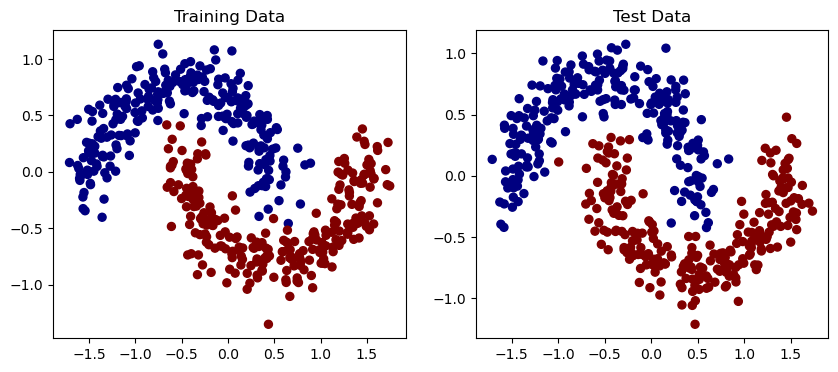

In [10]:
# Plot
plt.figure(figsize=(10,4))
p1 = plt.subplot(121)
size_vertex_plot = 33
plt.scatter(Xtrain[:,0], Xtrain[:,1], s=size_vertex_plot*np.ones(n), c=Cgt_train, color=pyplot.jet())
plt.title('Training Data')
p2 = plt.subplot(122)
size_vertex_plot = 33
plt.scatter(Xtest[:,0], Xtest[:,1], s=size_vertex_plot*np.ones(n), c=Cgt_test, color=pyplot.jet())
plt.title('Test Data')
#plt.tight_layout()
plt.show()


### Question 2: Compute linear kernel, L, Q, time steps, initialization and projection of alpha as for Question 1

Compare the results with the linearly separable case and determine which performs better. 

Answer: Linear case is better

What strategy can be used to enhance the performance of SVM on non-linearly separable data?

Answer: Kernel SVM, graph SVM 

<font color=cyan>

Nothing change in the code below. It is exactly the same, just different data.

And just as we expected, even using dual variable, a linear kernel still incapable of separating the non-linear data.

</font>

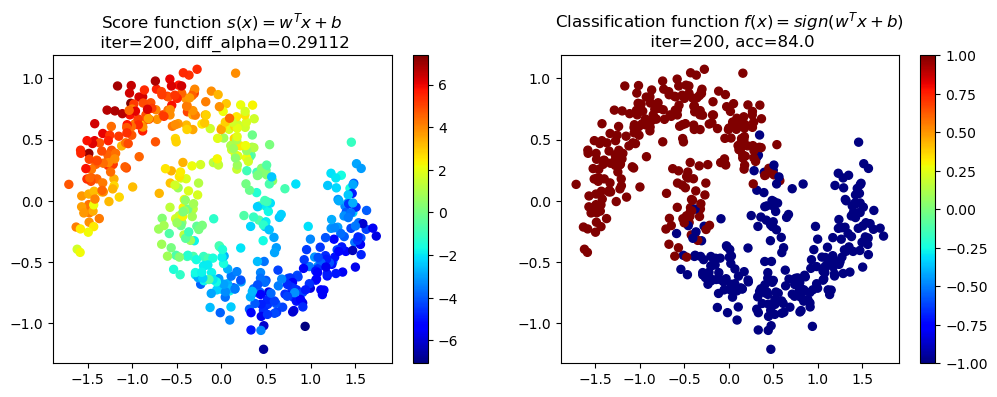

In [11]:
# Run Linear SVM

# Compute linear kernel, L, Q
Ker = Xtrain.dot(Xtrain.T)
l = l_train
L = np.diag(l)
Q = L.dot(Ker.dot(L))

# Time steps
tau_alpha = 10/ np.linalg.norm(Q,2)
tau_beta = 0.1/ np.linalg.norm(L,2)


# For conjuguate gradient
Acg = tau_alpha* Q + np.eye(n)

# Pre-compute J.K(Xtest) for test data
LKXtest = L.dot(Xtrain.dot(Xtest.T))

# Initialization
alpha = np.zeros([n])
beta = 0.0
alpha_old = alpha

# Loop
k = 0
diff_alpha = 1e6
num_iter = 201
while (diff_alpha>1e-3) & (k<num_iter):
    
    # Update iteration
    k += 1
    
    # Update alpha
    # Approximate solution with conjuguate gradient
    b0 = alpha + tau_alpha - tau_alpha* l* beta
    alpha, _ = scipy.sparse.linalg.cg(Acg, b0, x0=alpha, tol=1e-3, maxiter=50)   
    alpha[alpha<0.0] = 0 # Projection on [0,+infty]

    # Update beta
    beta = beta + tau_beta* l.T.dot(alpha)
    
    # Stopping condition
    diff_alpha = np.linalg.norm(alpha-alpha_old)
    alpha_old = alpha
    
    # Plot
    if not(k%10) or (diff_alpha<1e-3):
           
        # Indicator function of support vectors
        idx = np.where( np.abs(alpha)>0.25* np.max(np.abs(alpha)) )
        Isv = np.zeros([n]); Isv[idx] = 1
        nb_sv = len(Isv.nonzero()[0])
        
        # Offset
        if nb_sv > 1:
            b = (Isv.T).dot( l - Ker.dot(L.dot(alpha)) )/ nb_sv
        else:
            b = 0
            
        # Continuous score function
        f_test = alpha.T.dot(LKXtest) + b 

        # Binary classification function
        C_test = np.sign(f_test) # decision function in {-1,1}
        accuracy_test = compute_purity(0.5*(1+C_test),Cgt_test,nc) # 0.5*(1+C_test) in {0,1}

        # Plot
        size_vertex_plot = 33
        plt.figure(figsize=(12,4))
        p1 = plt.subplot(121)
        plt.scatter(Xtest[:,0], Xtest[:,1], s=size_vertex_plot*np.ones(n), c=f_test, color=pyplot.jet())
        plt.title('Score function $s(x)=w^Tx+b$ \n iter=' + str(k)+ ', diff_alpha=' + str(diff_alpha)[:7])
        plt.colorbar()
        p2 = plt.subplot(122)
        plt.scatter(Xtest[:,0], Xtest[:,1], s=size_vertex_plot*np.ones(n), c=C_test, color=pyplot.jet())
        plt.title('Classification function $f(x)=sign(w^Tx+b)$\n iter=' + str(k) + ', acc=' + str(accuracy_test)[:5])
        #plt.tight_layout()
        plt.colorbar()
        plt.show()
        if k<num_iter-1:
            clear_output(wait=True)   
        